# Coding Self-Attention in PyTroch!!!

By Josh Starmer

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

----

In this tutorial, we will code **Self-Attention** in **[PyTorch](https://pytorch.org/)**. **Attention** is an essential component of neural network **Transformers**, which are driving the current excitement in **Large Language Models** and **AI**. Specifically, an **Enecoder-Only Transformer**, illustrated below, is the foundation for the popular model **BERT**.

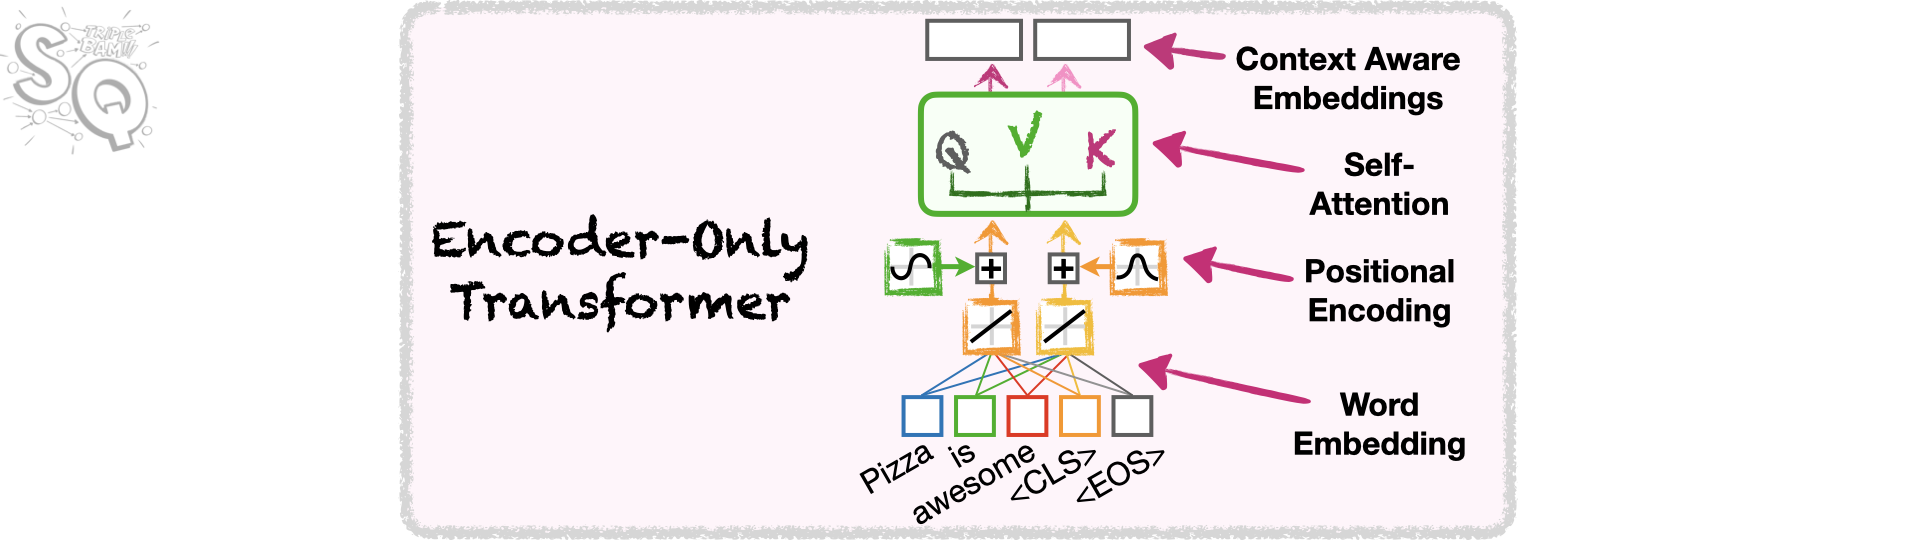

At the heart of **BERT** is **Self-Attention**, which allows it to establish relationships among the words, characters and symbols, that are used for input and collectively called **Tokens**. For example, in the illustration below, where the word **it** could potentially refer to either **pizza** or **oven**, **Attention** could help a **Transformer** establish the correctly relationship between the word **it** and **pizza**.


In this tutorial, you will...

- **[Code a Basic Self-Attention Class!!!](#selfAttention)** The basic self-attention class allows the transformer to establish relationships among words and tokens.

- **[Calculate Self-Attention Values!!!](#calculate)** We'll then use the class that we created, SelfAttention, to calculate self-attention values for some sample data.

- **[Verify The Calculations!!!](#validate)** Lastly, we'll validate the calculations made by the SelfAttention class..


----

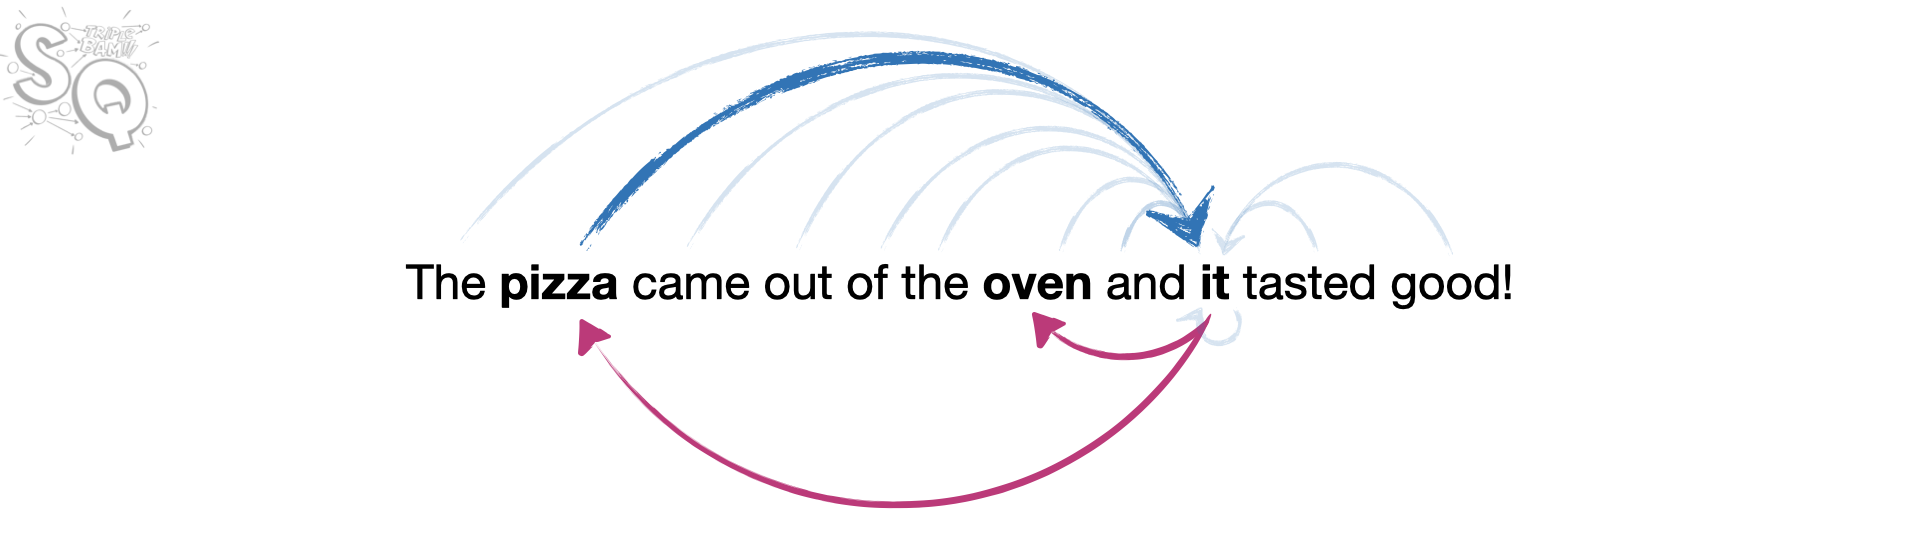

# Import the modules that will do all the work

In [ ]:
import torch ## torch let's us create tensors and also provides helper functions
import torch.nn as nn ## torch.nn gives us nn.module() and nn.Linear()
import torch.nn.functional as F # This gives us the softmax()

<p style="background-color:#fff6ff; padding:15px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px"> 💻 &nbsp; <b>Access <code>requirements.txt</code> file:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>. For more help, please see the <em>"Appendix - Tips and Help"</em> Lesson.</p>

----

# Code Self-Attention
<a id="selfAttention"></a>

In [ ]:
class SelfAttention(nn.Module):

    def __init__(self, d_model=2,
                 row_dim=0,
                 col_dim=1):
        ## d_model = the number of embedding values per token.
        ##           Because we want to be able to do the math by hand, we've
        ##           the default value for d_model=2.
        ##           However, in "Attention Is All You Need" d_model=512
        ##
        ## row_dim, col_dim = the indices we should use to access rows or columns


        super().__init__()

        ## Initialize the Weights (W) that we'll use to create the
        ## query (q), key (k) and value (v) for each token
        ## NOTE: A lot of implementations include bias terms when
        ##       creating the the queries, keys, and values, but
        ##       the original manuscript that described Attention,
        ##       "Attention Is All You Need" did not, so we won't either
        self.W_q = nn.Linear(in_features=d_model, out_features=d_model, bias=False)
        self.W_k = nn.Linear(in_features=d_model, out_features=d_model, bias=False)
        self.W_v = nn.Linear(in_features=d_model, out_features=d_model, bias=False)

        self.row_dim = row_dim
        self.col_dim = col_dim


    def forward(self, token_encodings):
        ## Create the query, key and values using the encoding numbers
        ## associated with each token (token encodings)
        q = self.W_q(token_encodings)
        k = self.W_k(token_encodings)
        v = self.W_v(token_encodings)

        ## Compute similarities scores: (q * k^T)
        sims = torch.matmul(q, k.transpose(dim0=self.row_dim, dim1=self.col_dim))

        ## Scale the similarities by dividing by sqrt(k.col_dim)
        scaled_sims = sims / torch.tensor(k.size(self.col_dim)**0.5)

        ## Apply softmax to determine what percent of each tokens' value to
        ## use in the final attention values.
        attention_percents = F.softmax(scaled_sims, dim=self.col_dim)

        ## Scale the values by their associated percentages and add them up.
        attention_scores = torch.matmul(attention_percents, v)

        return attention_scores

# BAM!

----

# Calculate Self-Attention
<a id="calculate"></a>

In [ ]:
## create a matrix of token encodings...
encodings_matrix = torch.tensor([[1.16, 0.23],
                                 [0.57, 1.36],
                                 [4.41, -2.16]])

## set the seed for the random number generator
torch.manual_seed(42)

## create a basic self-attention ojbect
selfAttention = SelfAttention(d_model=2,
                               row_dim=0,
                               col_dim=1)

## calculate basic attention for the token encodings
selfAttention(encodings_matrix)

# DOUBLE BAM!!

----

# Print Out Weights and Verify Calculations
<a id="validate"></a>

In [ ]:
## print out the weight matrix that creates the queries
selfAttention.W_q.weight.transpose(0, 1)

In [ ]:
## print out the weight matrix that creates the keys
selfAttention.W_k.weight.transpose(0, 1)

In [ ]:
## print out the weight matrix that creates the values
selfAttention.W_v.weight.transpose(0, 1)

In [ ]:
## calculate the queries
selfAttention.W_q(encodings_matrix)

In [ ]:
## calculate the keys
selfAttention.W_k(encodings_matrix)

In [ ]:
## calculate the values
selfAttention.W_v(encodings_matrix)

In [ ]:
q = selfAttention.W_q(encodings_matrix)
q

In [ ]:
k = selfAttention.W_k(encodings_matrix)
k

In [ ]:
sims = torch.matmul(q, k.transpose(dim0=0, dim1=1))
sims

In [ ]:
scaled_sims = sims / (torch.tensor(2)**0.5)
scaled_sims

In [ ]:
attention_percents = F.softmax(scaled_sims, dim=1)
attention_percents

In [ ]:
torch.matmul(attention_percents, selfAttention.W_v(encodings_matrix))

# TRIPLE BAM!!!